# An introductional notebook to HEP analysis in C++

<p>In this notebook you can find an easy set of commands that show some basic computing techniques commonly used in High Energy Physics (HEP) analyzes.</p>

<p>It also shows how to create an histogram, fill it and draw it. Moreover it is an introduction to [ROOT](https://root.cern.ch/) too. The final output is a plot with the number of leptons.</p>

Based on ATLAS opendata notebooks (http://opendata.atlas.cern/release/2020/documentation/notebooks/intro.html)


The library used is [ROOT](https://root.cern.ch/), a scientific data analysis software framework that provides a large set of functionalities needed to deal with big data processing, statistical analysis, visualisation and storage.

<p>At first we have to include several helpers that will support our analysis:</p>

In [1]:
#include <iostream>
#include <string>
#include <stdio.h>

Next we have to open the data that we want to analyze. As described above the data is stored in a _*.root_ file. This is a root file containing tracks and calorimeter clusters

In [2]:
TFile *file = TFile::Open("../Tracks_Clusters.root");
//TFile *file = TFile::Open("https://csandova.web.cern.ch/csandova/HEP-Ex-Course/Code/TracksClusters/Tracks_Clusters.root");

The next step is to define a tree named _tree_ to get the data out of the _*.root_ file. The tree in this root file is called "JetRecoTree". We will then print the contents of the tree to find the names of the variables. 

In [3]:
TTree *tree = (TTree*) file->Get("JetRecoTree");
tree->Print()

******************************************************************************
*Tree    :JetRecoTree: JetRecoTree                                            *
*Entries :   102900 : Total =      3334789039 bytes  File  Size = 2227126936 *
*        :          : Tree compression factor =   1.50                       *
******************************************************************************
*Br    0 :EventNumber : EventNumber/l                                        *
*Entries :   102900 : Total  Size=     836872 bytes  File Size  =     448624 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=   1.86     *
*............................................................................*
*Br    1 :RunNumber : RunNumber/l                                            *
*Entries :   102900 : Total  Size=     836610 bytes  File Size  =      20416 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=  40.84     *
*..................................................

After the data is opened we create a canvas on which we can draw a histogram. If we do not have a canvas we cannot see our histogram at the end. Its name is _Canvas_ and its header is _a first way to plot a variable_. The two following arguments define the width and the height of the canvas.

In [4]:
TCanvas *canvas = new TCanvas("Canvas","a first way to plot a variable",800,600);

# NPV


<p>The next step is to extract the varibles we want from the dataset. We will plot first an <b>"event"</b> variable: the number of primary vertices: 

In [5]:
UInt_t npv = -1;
tree->SetBranchAddress("NPV", &npv);

Now we define a histogram that will later be placed on this canvas. Its name is NPV and the header of the histogram is Example plot: Number of primary vertices. The three following arguments indicate that this histogram contains 50 so called bins which have a range from 1 to 50.

In [6]:
TH1F *hist_npv = new TH1F("NPV","Example plot: Number of primary vertices; NPV ; Events ",50,1,50);

The following lines are a loop that goes over the data that is stored in the tree and fills the histogram that we already defined. In this first notebook we don't do any cuts to keep it simple. Accordingly the loop fills the histogram for each event stored in the tree. After the program has looped over all the data it prints the word</p>
__Done!__.

In [7]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    hist_npv->Fill(npv);
}

std::cout << "Done!" << std::endl;

Done!


<p>After filling the histogram we want to see the results of the analysis. First we draw the histogram on the canvas and then the canvas on which the histogram lies:</p>

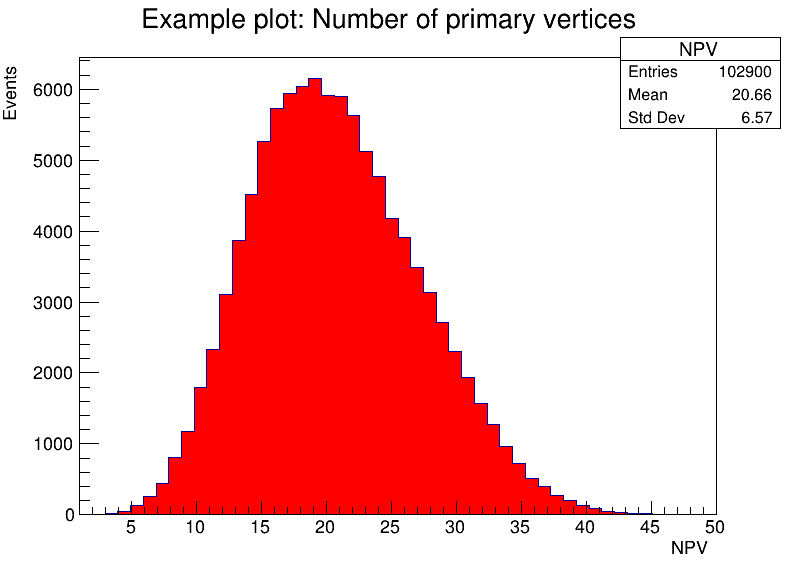

In [8]:
hist_npv->SetFillColor(kRed);
hist_npv->Draw();
canvas->Draw();

In [9]:
Float_t scale = hist_npv->Integral();
hist_npv->Scale(1/scale);
hist_npv->SetFillColor(2);

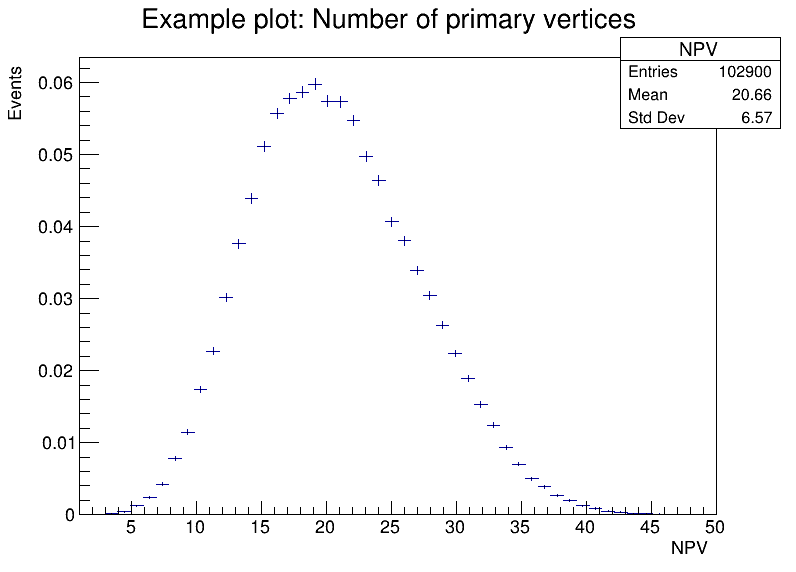

In [10]:
hist_npv->Draw();
canvas->Draw();
hist_npv=0;

<b>Excercises: 
    1. Plot the number of average interactions per bunch-crossing (mu_average)
    2. Make a 2D histogram of NPV vs. mu
</b>

# 1. mu_average

In [11]:
Float_t mu_average=-1;
tree->SetBranchAddress("mu_average", &mu_average);

In [12]:
TH1F *hist_mu_average = new TH1F("mu_average","number of average interactions per bunch-crossing; mu_average ; Events ",50,1,50);

In [13]:
int nentries, nbytes, i;
nentries = (Float_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    hist_mu_average->Fill(mu_average);
}

std::cout << "Done!" << std::endl;

Done!


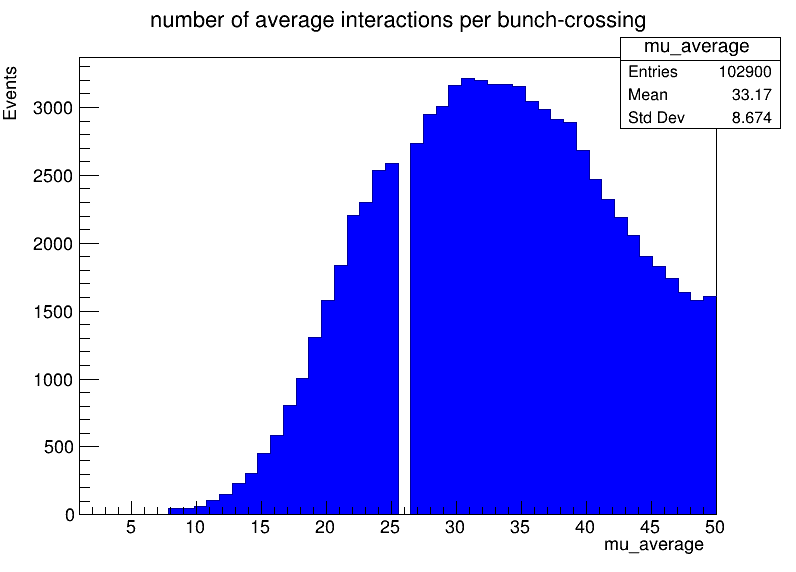

In [14]:
hist_mu_average->SetFillColor(kBlue);
hist_mu_average->Draw();
canvas->Draw();

In [15]:
Float_t scale = hist_mu_average->Integral();
hist_mu_average->Scale(1/scale);
hist_mu_average->SetFillColor(2);

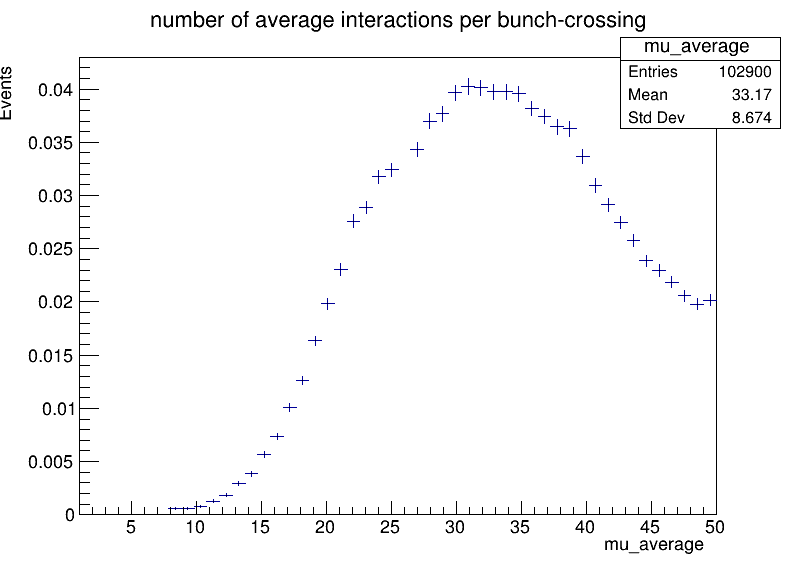

In [16]:
hist_mu_average->Draw();
canvas->Draw();
hist_mu_average=0;

## mu_average:
Esta medida se da en calorimetros deonde la lectura de las señales tiene un intervalo mayor al intervalo entre estas y por lo mismo se reciben las señales de eventos consecutivos.

# 2. NPV vs mu

In [17]:
TH2F *hist_muvsNPV = new TH2F("NPVvsmu","NPV vs mu_average; NPV; mu_average",50,1,50,50,1,50);

In [18]:
int nentries, nbytes, i;
nentries = (Float_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    hist_muvsNPV->Fill(npv,mu_average);
}

std::cout << "Done!" << std::endl;

Done!


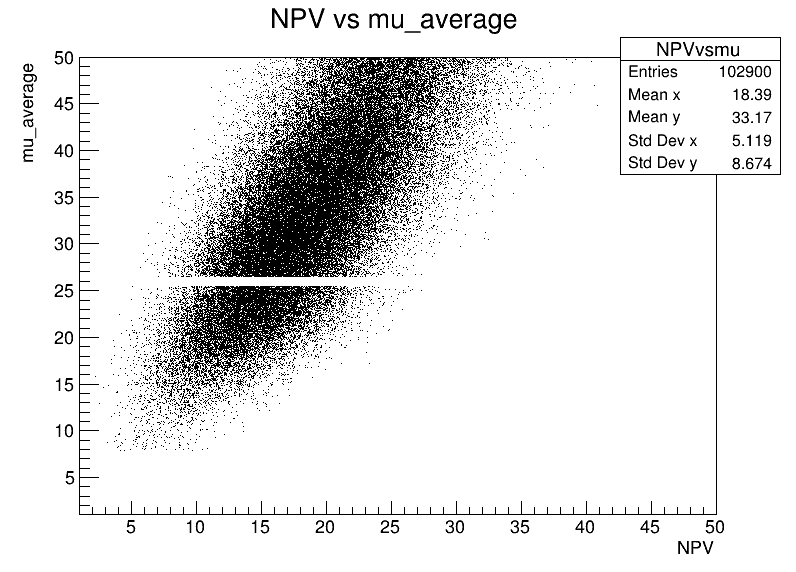

In [19]:
hist_muvsNPV->SetFillColor(kBlue);
hist_muvsNPV->Draw();//"LEGO2");
canvas->Draw();//"LEGO2");
hist_muvsNPV=0;

Some branches are not event variables, but objects with some kinematical infomation. They are stored in vectors. For example tracks and clusters. We will create two histograms to store the number of tracks and clusters in each event. 

In [20]:
TH1F *hist_nTrks = new TH1F("NTracks","Example plot: Number of tracks; NTracks ; Events ",50,0,1000);
TH1F *hist_nCltrs = new TH1F("NClusters","Example plot: Number of clusters; NClusters ; Events ",50,0,1000);

Now we activate two branches

In [21]:
vector<float> *tracks_pt;
vector<float> *clusters_pt;

tree->SetBranchAddress("Tracks_pt", &tracks_pt);
tree->SetBranchAddress("Clusters_pt", &clusters_pt);

For each event, fill the histograms with the size of the vectors

In [22]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    hist_nTrks->Fill(tracks_pt->size());
    hist_nCltrs->Fill(clusters_pt->size());

}

std::cout << "Done!" << std::endl;

Done!


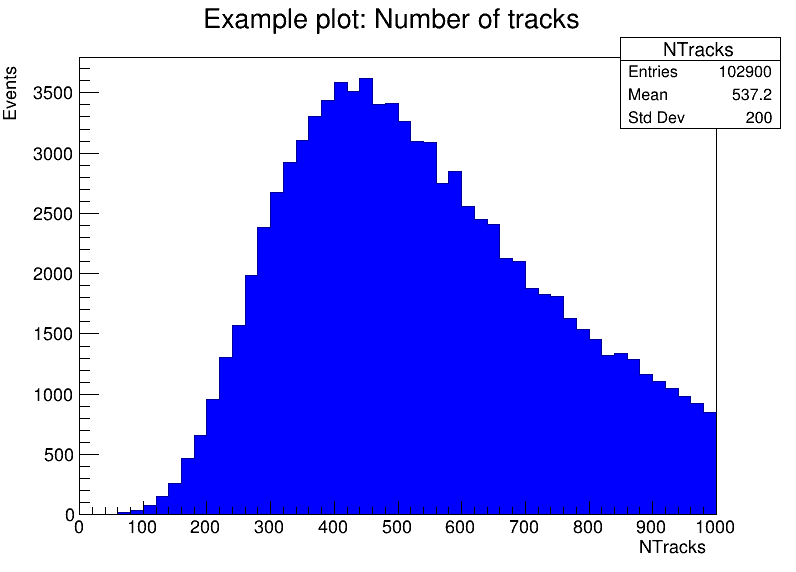

In [23]:
hist_nTrks->SetFillColor(kBlue);
hist_nTrks->Draw();
canvas->Draw();
hist_nTrks=0;

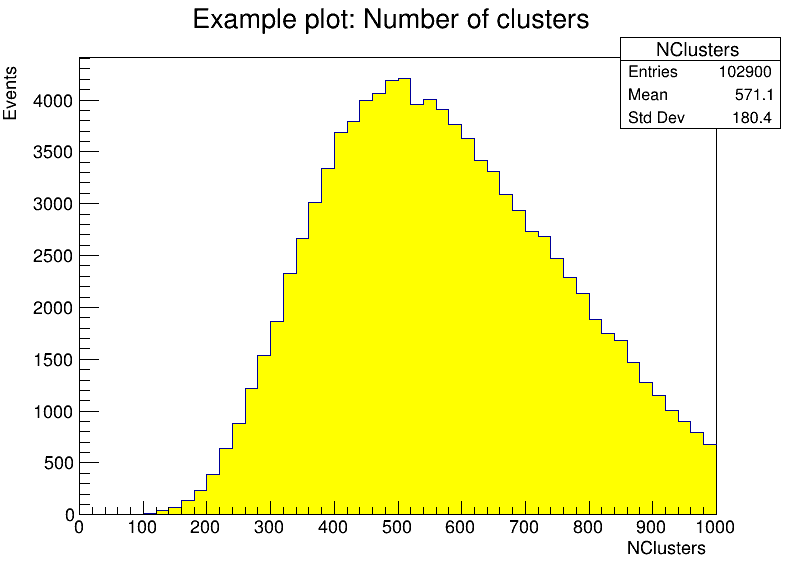

In [24]:
hist_nCltrs->SetFillColor(kYellow);
hist_nCltrs->Draw();
canvas->Draw();
hist_nCltrs=0;

<b>Excercise: 
    3. Make a 2D histogram of NPV and mu vs. nTracks and nClusters
</b>

# 3. 2D histogram of NPV and mu vs. nTracks and nClusters

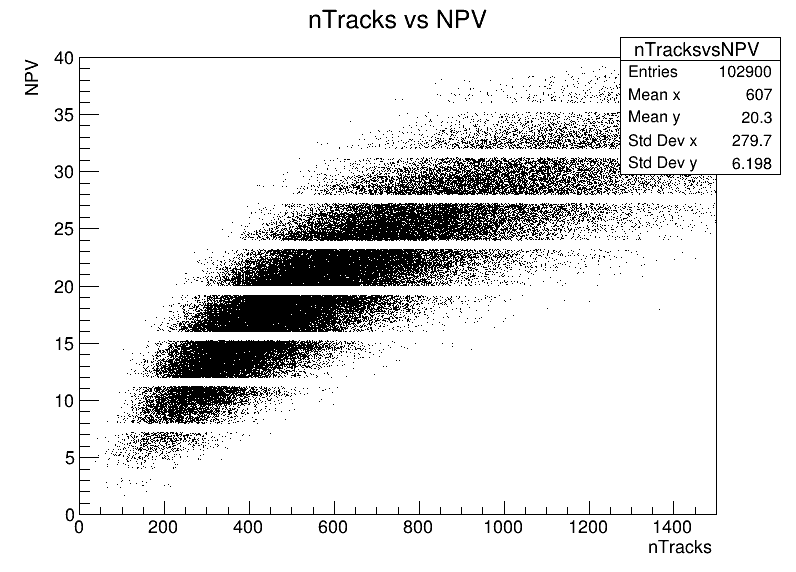

In [25]:
TH2F *hist_nTracksvsNPV = new TH2F("nTracksvsNPV","nTracks vs NPV; nTracks; NPV",50,0,1500,50,0,40);
int nentries, nbytes, i;
nentries = (Float_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    hist_nTracksvsNPV->Fill(tracks_pt->size(),npv);
}
hist_nTracksvsNPV->SetFillColor(kRed);
hist_nTracksvsNPV->Draw();
canvas->Draw();
hist_nTracksvsNPV=0;


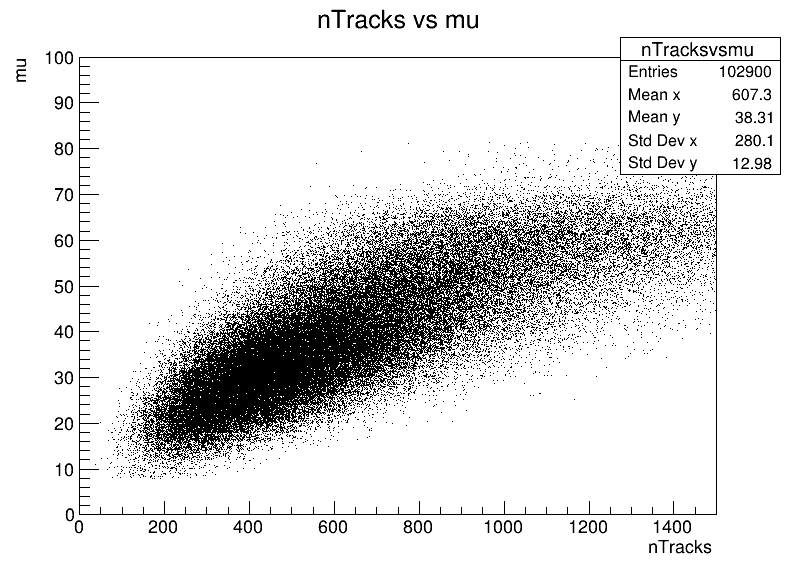

In [26]:
TH2F *hist_nTracksvsmu = new TH2F("nTracksvsmu","nTracks vs mu; nTracks; mu",50,0,1500,50,0,100);
int nentries, nbytes, i;
nentries = (Float_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    hist_nTracksvsmu->Fill(tracks_pt->size(),mu_average);
}
hist_nTracksvsmu->SetFillColor(kRed);
hist_nTracksvsmu->Draw();
canvas->Draw();
hist_nTracksvsmu=0;


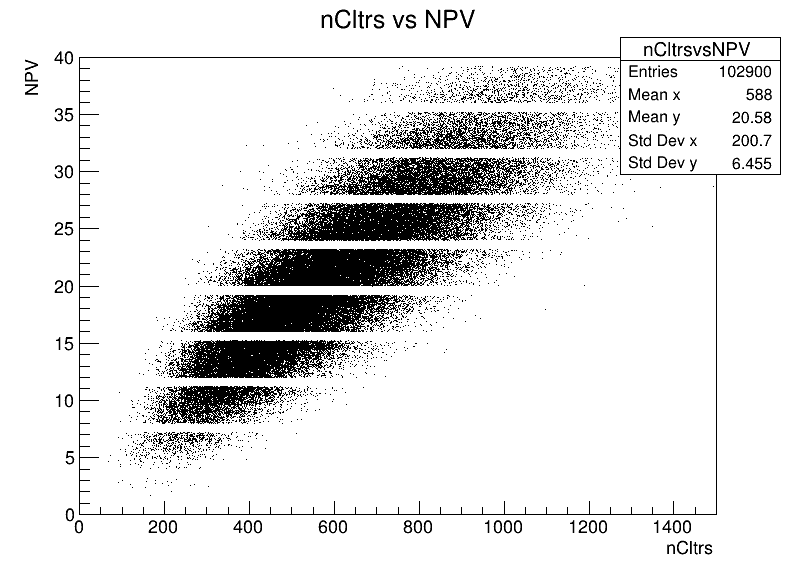

In [27]:
TH2F *hist_nCltrsvsNPV = new TH2F("nCltrsvsNPV","nCltrs vs NPV; nCltrs; NPV",50,0,1500,50,0,40);
int nentries, nbytes, i;
nentries = (Float_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    hist_nCltrsvsNPV->Fill(clusters_pt->size(),npv);
}
hist_nCltrsvsNPV->SetFillColor(kRed);
hist_nCltrsvsNPV->Draw();
canvas->Draw();
hist_nCltrsvsNPV=0;


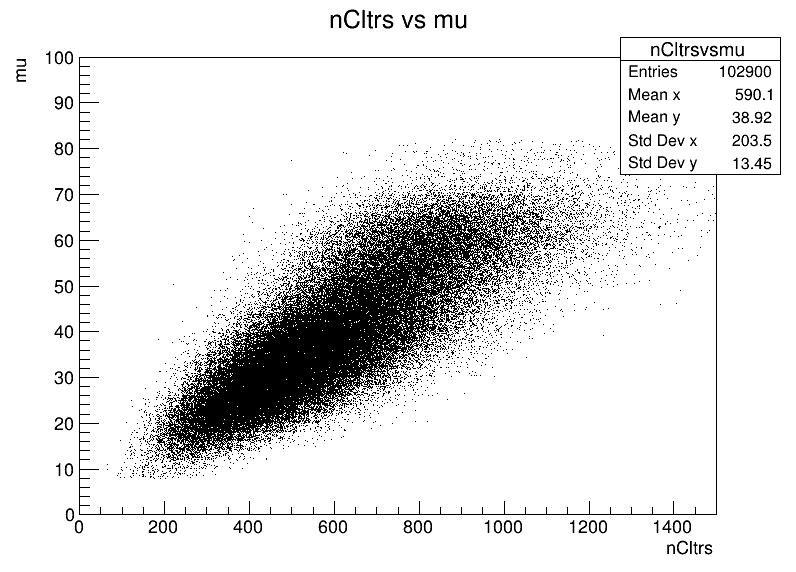

In [28]:
TH2F *hist_nCltrsvsmu = new TH2F("nCltrsvsmu","nCltrs vs mu; nCltrs; mu",50,0,1500,50,0,100);
int nentries, nbytes, i;
nentries = (Float_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    hist_nCltrsvsmu->Fill(clusters_pt->size(),mu_average);
}
hist_nCltrsvsmu->SetFillColor(kRed);
hist_nCltrsvsmu->Draw();
canvas->Draw();
hist_nCltrsvsmu=0;


Now let us plot the pT of the "lead" track:

In [29]:
TH1F *hist_lead_track_pT = new TH1F("Lead_Track_pT","Example plot: Track pT; pT (MeV) ; Events ",50,100,1000);

In [30]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<tracks_pt->size(); tr++)
    {
        hist_lead_track_pT->Fill(tracks_pt->at(tr));
    }
}

std::cout << "Done!" << std::endl;

Done!


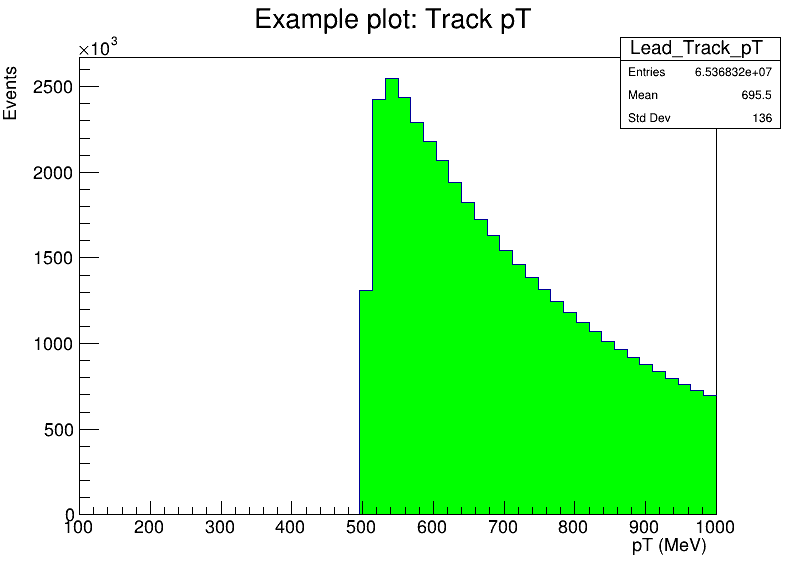

In [31]:
hist_lead_track_pT->SetFillColor(kGreen);
hist_lead_track_pT->Draw();
canvas->Draw();
hist_lead_track_pT=0;

<b>Excercises: 
4. Plot all track and cluster variables
5. Interpret the meaning of each variable
6. What is "Particle PDG ID"?
</b>

# 4. Plot all track and cluster variables

## Tracks_eta

In [32]:
vector<float> *tracks_eta;
tree->SetBranchAddress("Tracks_eta", &tracks_eta);
TH1F *hist_track_eta = new TH1F("Track_eta","Track eta; eta ; Events ",50,-3,3);
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

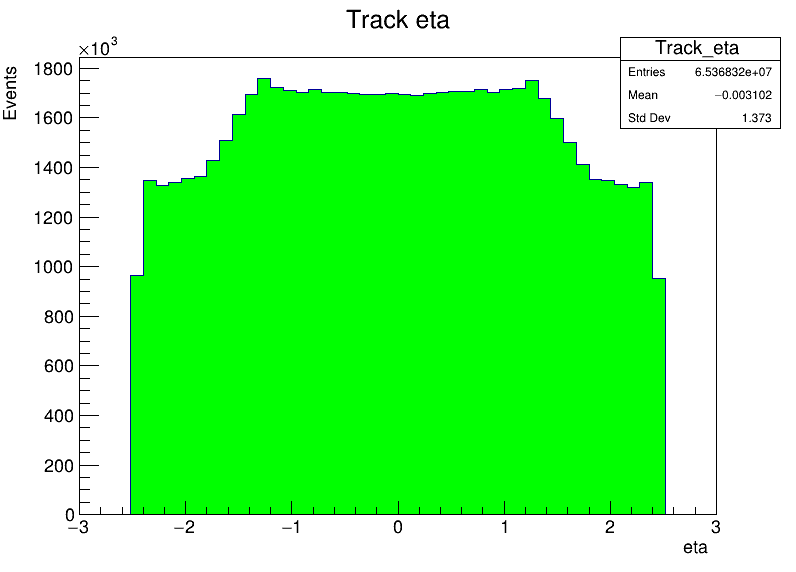

In [33]:
for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<tracks_eta->size(); tr++)
    {
        hist_track_eta->Fill(tracks_eta->at(tr));
    }

}
hist_track_eta->SetFillColor(kGreen);
hist_track_eta->Draw();
canvas->Draw();
hist_track_eta=0;

## Tracks_phi

In [34]:
vector<float> *tracks_phi;
tree->SetBranchAddress("Tracks_phi", &tracks_phi);
TH1F *hist_track_phi = new TH1F("Track_phi","Track phi; phi ; Events ",50,-4,4);
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

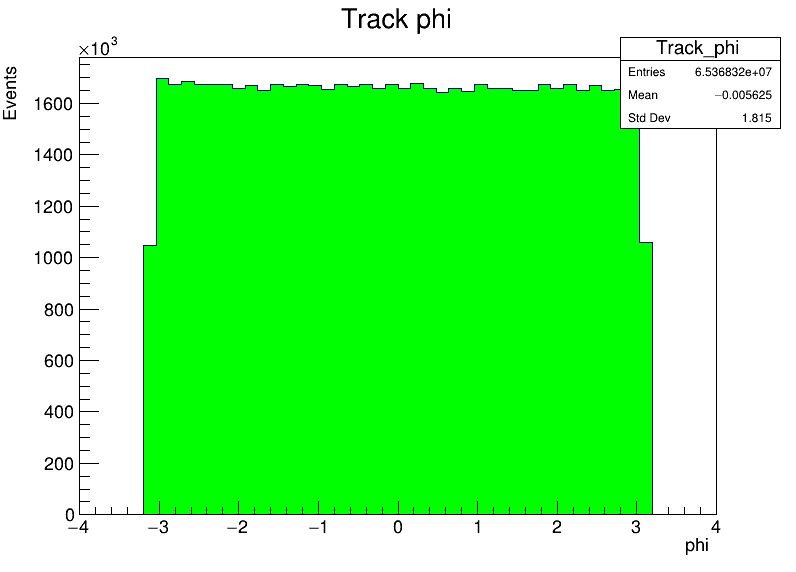

In [35]:
for (i = 0; i < nentries; i++)
{
 
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<tracks_eta->size(); tr++)
    {
        hist_track_phi->Fill(tracks_phi->at(tr));
    }                     
}
hist_track_phi->SetFillColor(kGreen);
hist_track_phi->Draw();
canvas->Draw();
hist_track_phi=0;

## Tracks_m

In [36]:
vector<float> *tracks_m;
tree->SetBranchAddress("Tracks_m", &tracks_m);

TH1F *hist_track_m = new TH1F("Track_m","Track m; m ; Events ",50,-10000,10000);
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

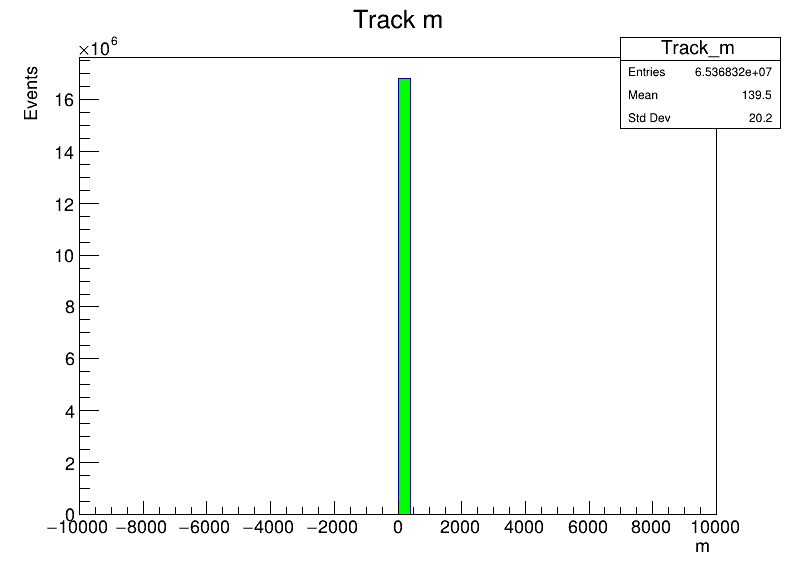

In [37]:
for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<tracks_eta->size(); tr++)
    {
        hist_track_m->Fill(tracks_m->at(tr));
    }
}
hist_track_m->SetFillColor(kGreen);
hist_track_m->Draw();
canvas->Draw();
hist_track_m=0;

## Tracks_vtx

In [38]:
vector<float> *tracks_vtx;
tree->SetBranchAddress("Tracks_vtx", &tracks_vtx);

TH1F *hist_track_vtx = new TH1F("Track_vtx","Track vtx; vtx ; Events ",50,-10,40);
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

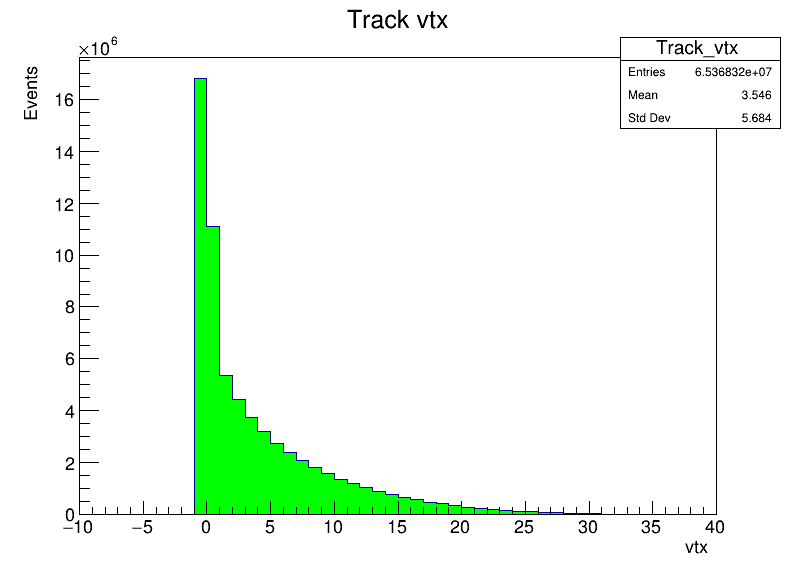

In [39]:
for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<tracks_vtx->size(); tr++)
    {
        hist_track_vtx->Fill(tracks_vtx->at(tr));
    }

}
hist_track_vtx->SetFillColor(kGreen);
hist_track_vtx->Draw();
canvas->Draw();
hist_lead_track_vtx=0;

## Clusters_pt

In [40]:
vector<float> *Clusters_pt;
tree->SetBranchAddress("Clusters_pt", &Clusters_pt);

TH1F *hist_Clusters_pt = new TH1F("Clusters_pt","Clusters_pt; pt ; Events ",50,100,1000);
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

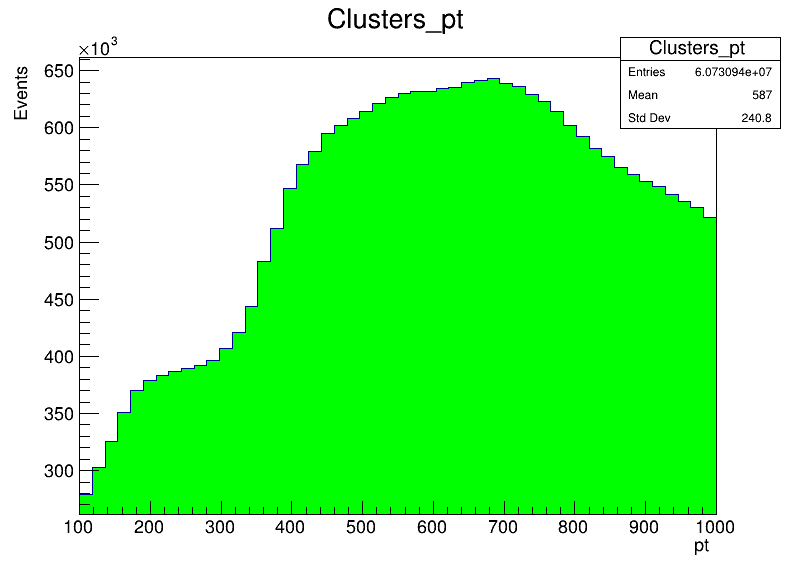

In [41]:
for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<Clusters_pt->size(); tr++)
    {
        hist_Clusters_pt->Fill(Clusters_pt->at(tr));
    }

}
hist_Clusters_pt->SetFillColor(kGreen);
hist_Clusters_pt->Draw();
canvas->Draw();
hist_Clusters_pt=0;

## Clusters_eta

In [42]:
vector<float> *Clusters_eta;
tree->SetBranchAddress("Clusters_eta", &Clusters_eta);

TH1F *hist_Clusters_eta = new TH1F("Clusters_eta","eta; Clusters_eta ; Events ",50,-6,6);
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

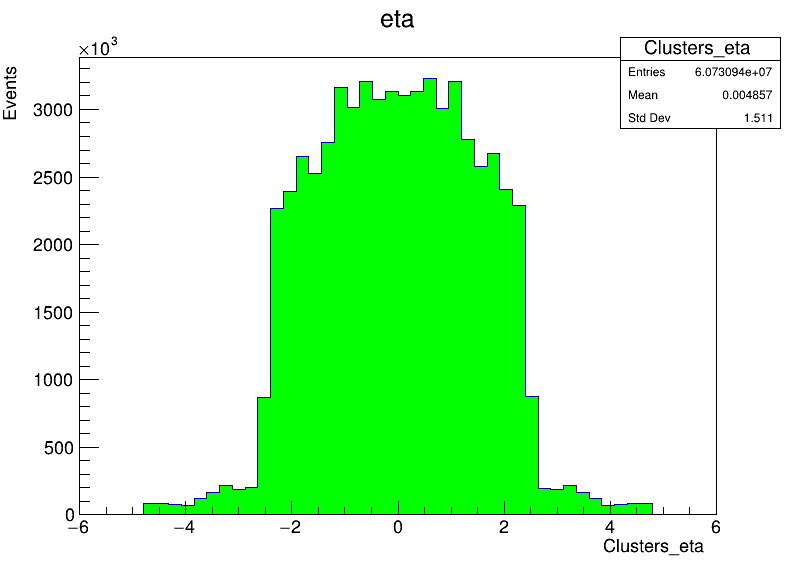

In [43]:
for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<Clusters_eta->size(); tr++)
    {
        hist_Clusters_eta->Fill(Clusters_eta->at(tr));
    }

}
hist_Clusters_eta->SetFillColor(kGreen);
hist_Clusters_eta->Draw();
canvas->Draw();
hist_Clusters_eta=0;

## Clusters_phi 

In [44]:
vector<float> *Clusters_phi ;
tree->SetBranchAddress("Clusters_phi", &Clusters_phi);

TH1F *hist_Clusters_phi = new TH1F("Clusters_phi","Clusters_phi ; phi ; Events ",50,-6,6);
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

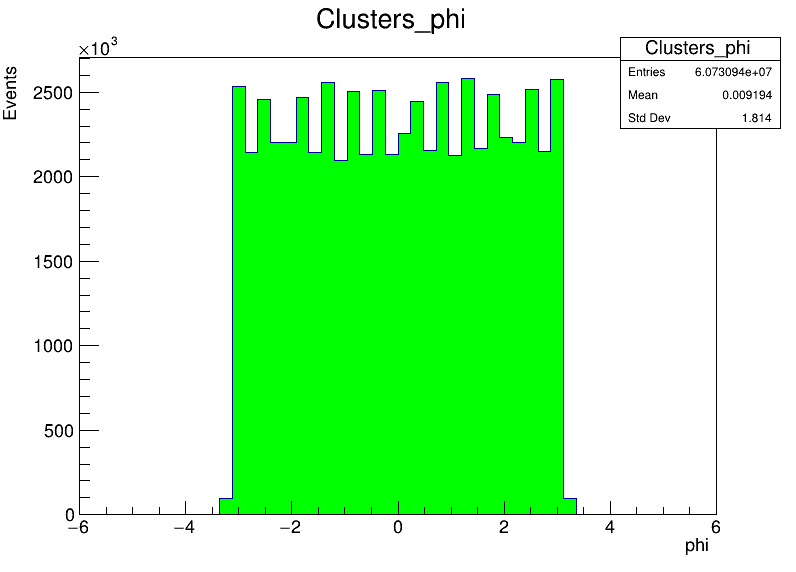

In [45]:
for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<Clusters_phi->size(); tr++)
    {
        hist_Clusters_phi->Fill(Clusters_phi->at(tr));
    }

}
hist_Clusters_phi->SetFillColor(kGreen);
hist_Clusters_phi->Draw();
canvas->Draw();
hist_Clusters_phi=0;

## Clusters_m

In [46]:
vector<float> *Clusters_m;
tree->SetBranchAddress("Clusters_m", &Clusters_m);
TH1F *hist_Clusters_m = new TH1F("Clusters_m","Clusters_m; m ; Events ",50,-1,1);
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

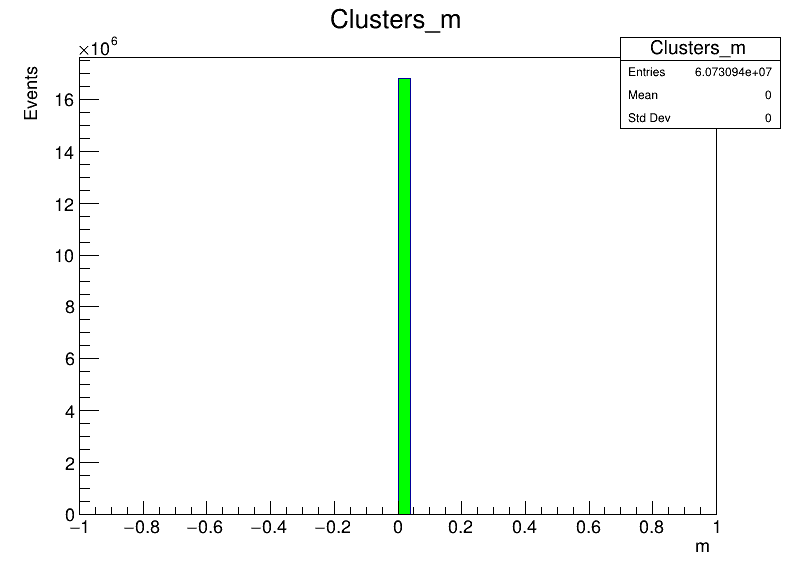

In [47]:
for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<Clusters_m->size(); tr++)
    {
        hist_Clusters_m->Fill(Clusters_m->at(tr));
    }

}
hist_Clusters_m->SetFillColor(kGreen);
hist_Clusters_m->Draw();
canvas->Draw();
hist_Clusters_m;

## Particles_pdgID

In [48]:
vector<float> *Particles_pdgID;
tree->SetBranchAddress("Particles_pdgID", &Particles_pdgID);

TH1F *hist_Particles_pdgID = new TH1F("Particles_pdgID","Particles_pdgID; pdgID ; Events ",50,-3500,3500);
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

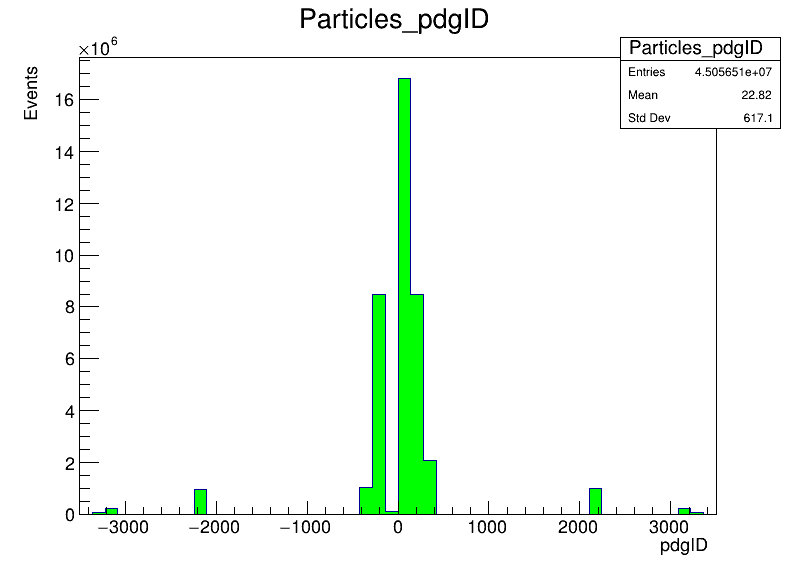

In [49]:
for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<Particles_pdgID->size();tr++)
    {
        hist_Particles_pdgID->Fill(Particles_pdgID->at(tr));
    }
}
hist_Particles_pdgID->SetFillColor(kGreen);
hist_Particles_pdgID->Draw();
canvas->Draw();
hist_Particles_pdgID=0;

## Particles_pdgID
Número utilizado para identificar las partículas dentro de la información, en este caso vemos que la mayor concentración es de particulas de tipo 22 que serían bosones gamma.

## Particles_pt

In [50]:
vector<float> *Particles_pt;
tree->SetBranchAddress("Particles_pt", &Particles_pt);

TH1F *hist_Particles_pt = new TH1F("Particles_pt","Particles_pt; pt ; Events ",50,-3500,3500);
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

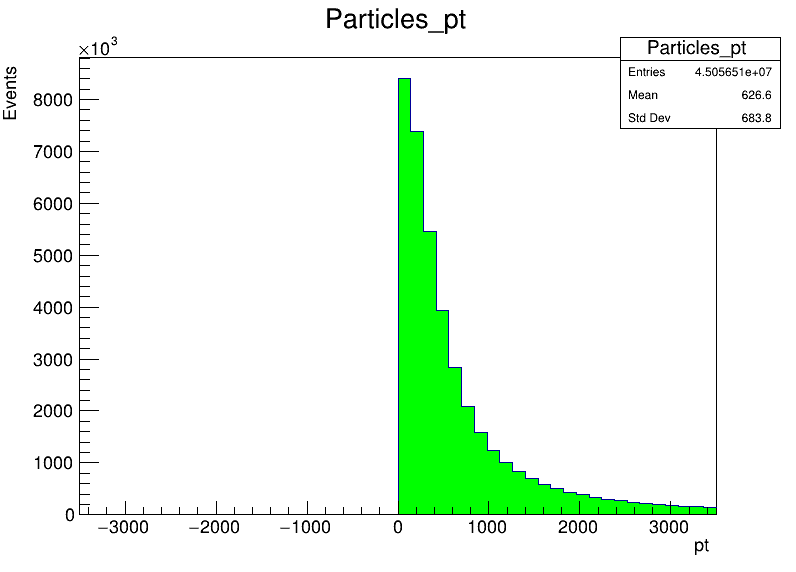

In [51]:
for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<Particles_pt->size();tr++)
    {
        hist_Particles_pt->Fill(Particles_pt->at(tr));
    }
}
hist_Particles_pt->SetFillColor(kGreen);
hist_Particles_pt->Draw();
canvas->Draw();
hist_Particles_pt=0;

## Particles_eta

In [52]:
vector<float> *Particles_eta;
tree->SetBranchAddress("Particles_eta", &Particles_eta);

TH1F *hist_Particles_eta = new TH1F("Particles_eta","Particles_eta; eta ; Events ",50,-6,6);
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

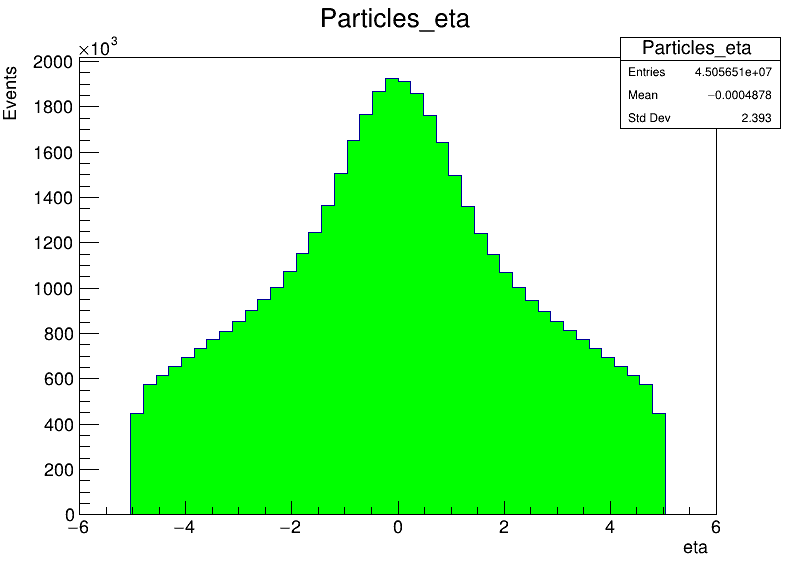

In [53]:
for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<Particles_eta->size();tr++)
    {
        hist_Particles_eta->Fill(Particles_eta->at(tr));
    }
}
hist_Particles_eta->SetFillColor(kGreen);
hist_Particles_eta->Draw();
canvas->Draw();
hist_Particles_eta=0;

## Particles_phi

In [54]:
vector<float> *Particles_phi;
tree->SetBranchAddress("Particles_phi", &Particles_phi);

TH1F *hist_Particles_phi = new TH1F("Particles_phi","Particles_phi; phi ; Events ",50,-5,5);
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

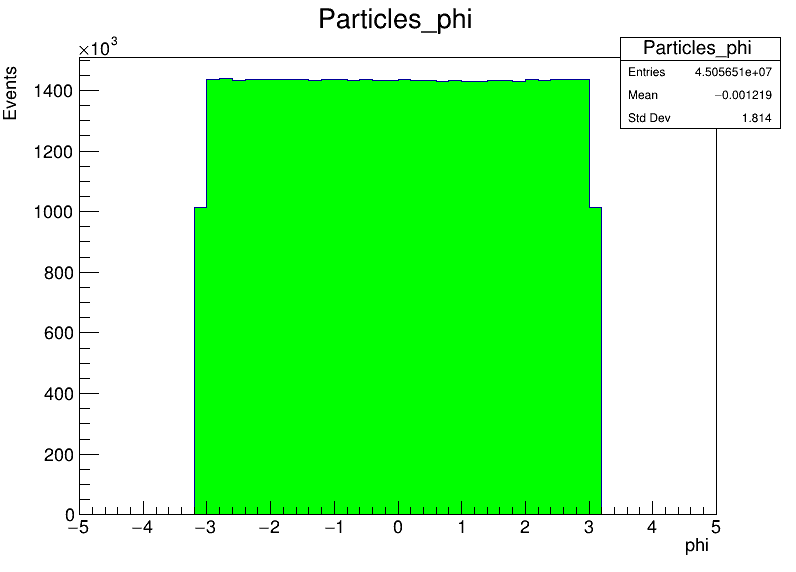

In [55]:
for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<Particles_phi->size();tr++)
    {
        hist_Particles_phi->Fill(Particles_phi->at(tr));
    }
}
hist_Particles_phi->SetFillColor(kGreen);
hist_Particles_phi->Draw();
canvas->Draw();
hist_Particles_phi=0;

## Particles_m

In [56]:
vector<float> *Particles_m;
tree->SetBranchAddress("Particles_m", &Particles_m);

TH1F *hist_Particles_m = new TH1F("Particles_m","Particles_m; m ; Events ",50,-3500,3500);
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

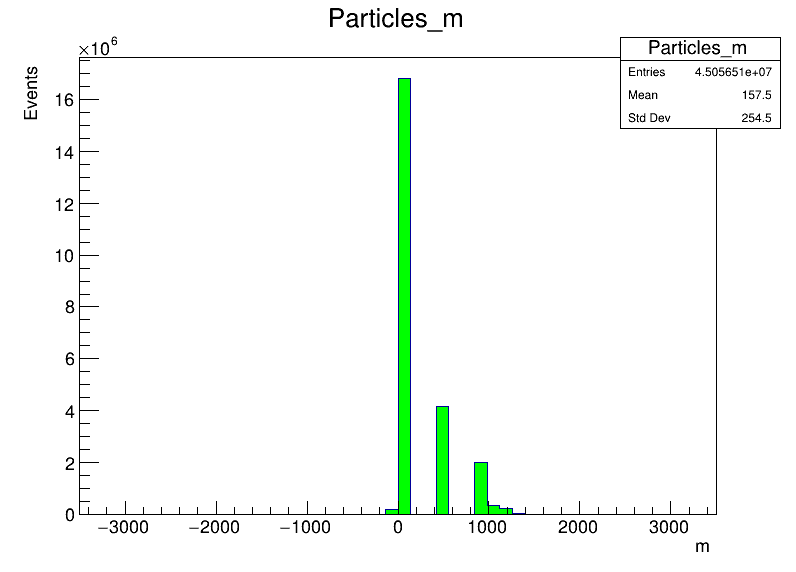

In [57]:
for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<Particles_m->size();tr++)
    {
        hist_Particles_m->Fill(Particles_m->at(tr));
    }
}
hist_Particles_m->SetFillColor(kGreen);
hist_Particles_m->Draw();
canvas->Draw();
hist_Particles_m=0;

# Descripción de las variables
Las variables pt, eta, phi y m representan el momento transverso, la pseudo rapidez, el ángulo azimutal y la masa, sea esta para una particula, para una traza o para un cluster, mientras que la variable Tracks_vtx se refiere a el vertice al cual pertenece la traza.